<a href="https://colab.research.google.com/github/Mrunmaigaikwad1/PRODIGY_DS_03/blob/main/PRODIGY_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

df = pd.read_csv('/content/bank-additional-full.csv', sep=';', header=0)
print(df.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [5]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df)

# Check for missing values
print(df.isnull().sum())

# If there are missing values, you can handle them by filling or dropping
# df = df.fillna(df.mean())  # Example: Fill missing values with column mean


age                     0
duration                0
campaign                0
pdays                   0
previous                0
                       ..
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
y_no                    0
y_yes                   0
Length: 65, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop('y_yes', axis=1)  # Target column 'y_yes' indicates whether the customer subscribed
y = df['y_yes']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0000
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10968
        True       1.00      1.00      1.00      1389

    accuracy                           1.00     12357
   macro avg       1.00      1.00      1.00     12357
weighted avg       1.00      1.00      1.00     12357

[[10968     0]
 [    0  1389]]


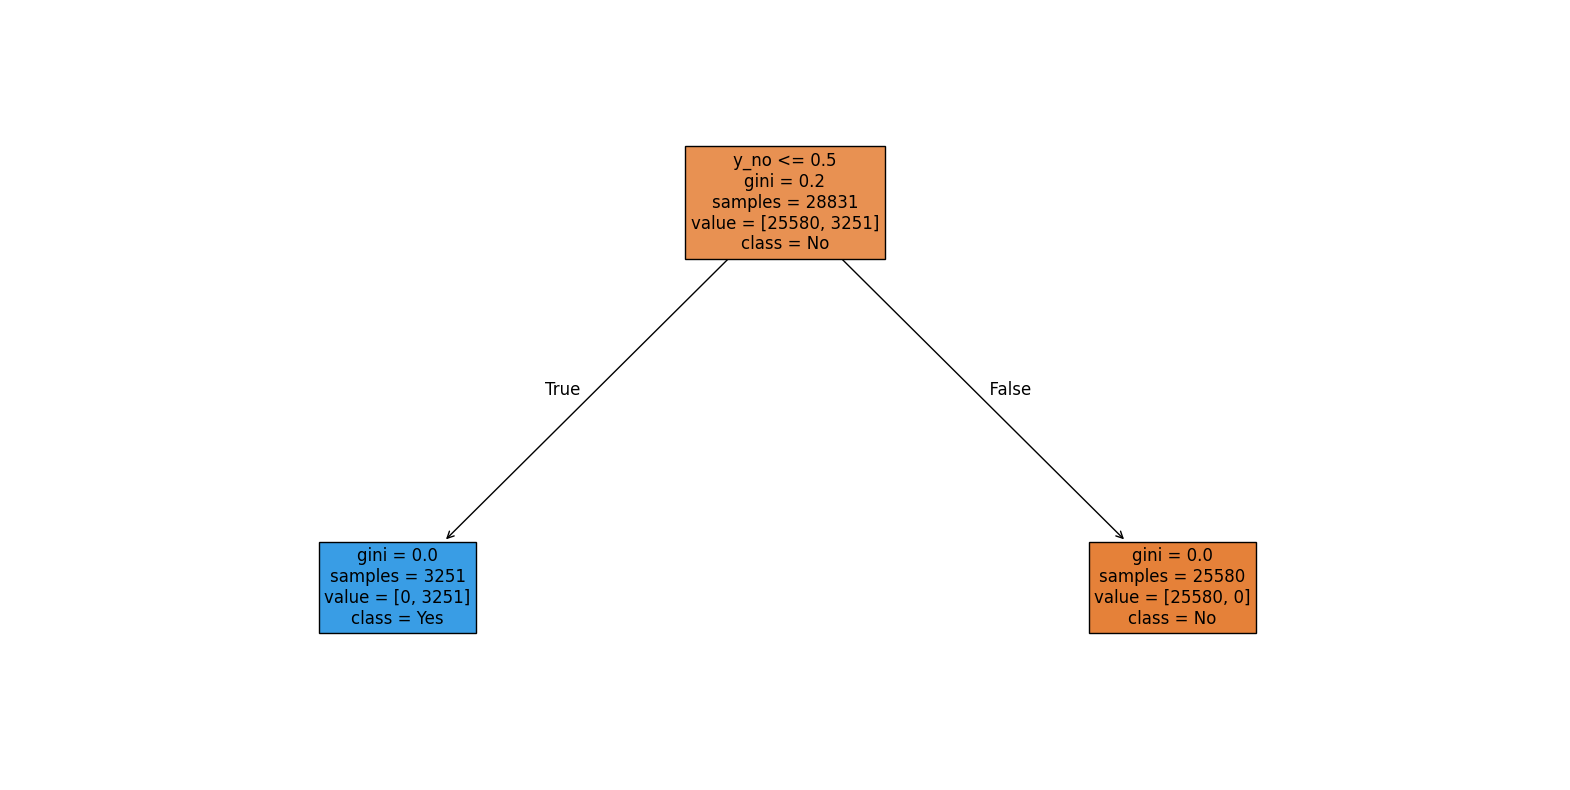

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], fontsize=12)
plt.show()


In [11]:
# Hyperparameter tuning using GridSearchCV (optional)
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator
best_clf = grid_search.best_estimator_


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [12]:
# Make predictions on the test set using the best model
y_pred = best_clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (tuned): {accuracy:.4f}")


Accuracy (tuned): 1.0000
